---
---
# CLASSIFICATIONS MODELS
---
---

* GEREKLİ KÜTÜPHANELER

In [79]:
import numpy                as np
import pandas               as pd
import statsmodels.api      as sm
import seaborn              as sns
import matplotlib.pyplot    as plt
from sklearn.preprocessing      import scale, StandardScaler
from sklearn.model_selection    import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics            import confusion_matrix,accuracy_score,mean_squared_error,r2_score, roc_auc_score,roc_curve,classification_report
from sklearn.linear_model       import LogisticRegression
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.svm                import SVC
from sklearn.neural_network     import MLPClassifier
from sklearn.tree               import DecisionTreeClassifier
from sklearn.ensemble           import RandomForestClassifier
from sklearn.ensemble           import GradientBoostingClassifier

In [80]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### VERİ SETİ HİKAYESİ VE ŞEKER HASTALIĞI TAHMİNİ

In [81]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [84]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [85]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [86]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


---
# LOJİSTİK REGRESYON (LOGISTIC REGRESSION)
---

# MODEL KURMA & MODEL TAHMİN

In [87]:
loj_model = LogisticRegression(solver="liblinear").fit(X,Y)

In [88]:
loj_model.intercept_

array([-5.84073324])

In [89]:
loj_model.coef_

array([[ 1.16937119e-01,  2.82506791e-02, -1.69647463e-02,
         7.64900753e-04, -6.30568264e-04,  5.91967766e-02,
         6.68475894e-01,  7.08845329e-03]])

In [90]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [91]:
Y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [92]:
y_pred = loj_model.predict(X)
confusion_matrix(Y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [93]:
accuracy_score(Y, y_pred)

0.7747395833333334

In [94]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [95]:
loj_model.predict_proba(X)[0:10]

array([[0.35208919, 0.64791081],
       [0.91613598, 0.08386402],
       [0.22544273, 0.77455727],
       [0.92033572, 0.07966428],
       [0.16985872, 0.83014128],
       [0.79768782, 0.20231218],
       [0.8787278 , 0.1212722 ],
       [0.2764273 , 0.7235727 ],
       [0.32085978, 0.67914022],
       [0.9216265 , 0.0783735 ]])

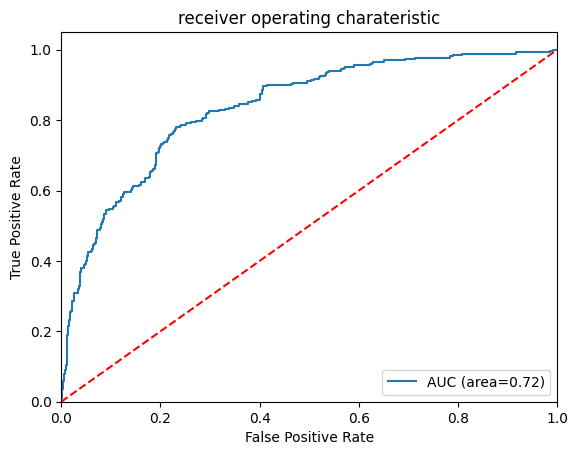

In [96]:
#roc egrisi
logit_roc_auc = roc_auc_score(Y, loj_model.predict(X))
fpr,tpr,thresholds = roc_curve(Y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("receiver operating charateristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

# MODEL VALIDATION (MODEL DOĞRULAMA)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

In [98]:
loj_cv_model = LogisticRegression(solver="liblinear").fit(X_train,Y_train)

In [99]:
y_pred = loj_cv_model.predict(X_test)

In [100]:
print(accuracy_score(Y_test,y_pred))

0.7532467532467533


In [101]:
cross_val_score(loj_model, X_test, Y_test, cv=10).mean()

0.7748188405797102

---
# LOJİSTİK REGRESYON (LOGISTIC REGRESSION)
---

In [102]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [103]:
knn_model = KNeighborsClassifier().fit(X_train,Y_train)
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [104]:
y_pred = knn_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.6883116883116883
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# MODEL TUNING

In [105]:
knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(1,50)}

knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train,Y_train)

print(knn_cv_model.best_params_)
print(knn_cv_model.best_score_)

{'n_neighbors': 11}
0.748637316561845


In [106]:
#final
knn_tuned = KNeighborsClassifier(n_neighbors=11).fit(X_train,Y_train)

y_pred = knn_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7316017316017316

In [107]:
knn_tuned.score(X_test,Y_test)

0.7316017316017316

---
# DESTEK VEKTÖR MAKİNELERİ (SVM)
---

In [109]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [116]:
svm_model = SVC(kernel="linear").fit(X_train,Y_train)
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [118]:
y_pred = svm_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7445887445887446


# MODEL TUNING

In [125]:
svm = SVC().fit(X_train,Y_train)
svm_params = {"C": np.arange(1,10), 
              "kernel":["linear","rbf"]}

svm_cv_model = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(svm_cv_model.best_params_)
print(svm_cv_model.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'C': 2, 'kernel': 'linear'}
0.7839044652128765


In [126]:
#final
svm_tuned = SVC(C=2,kernel="linear").fit(X_train,Y_train)

y_pred = svm_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7445887445887446

---
# YAPAY SİNİR AĞLARI 
# (ÇOK KATMANLI ALGILAYICILAR) 
# (DERİN ÖĞRENME) 
# (DEEP LEARNING)
# (NEURAL NETWORK)
---

In [127]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [132]:
mlpc_model = MLPClassifier().fit(X_train,Y_train)
mlpc_model.get_params()

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [133]:
mlpc_model.coefs_

[array([[-1.94339210e-01,  2.38869240e-01,  2.36576029e-01,
         -8.52049765e-02, -1.31359497e-01, -4.69538710e-02,
          2.27466613e-03,  2.44432675e-01, -2.45415375e-11,
          2.64983904e-05, -4.53415588e-10,  4.39005763e-02,
         -1.25402850e-01, -6.98384963e-02,  1.20828709e-01,
         -1.66677493e-01, -1.79701790e-01, -1.92514895e-01,
         -9.56204239e-02,  3.77215607e-02,  1.02128349e-01,
         -1.78490762e-01, -9.52893087e-02, -3.00788467e-05,
         -1.84352407e-01, -2.02186166e-02, -5.18459095e-03,
          1.82569354e-03, -1.38250970e-01,  2.11755111e-02,
         -1.25649100e-01, -7.42041278e-02,  1.00221179e-01,
          1.92435341e-05,  9.08863628e-02,  7.11792710e-02,
         -1.76257334e-01,  2.67280615e-01,  1.91669836e-01,
          4.55598692e-02, -1.40074369e-02,  9.05601898e-02,
          1.05187232e-01,  3.96146715e-01, -2.05449332e-01,
          1.76308329e-01, -1.96733082e-03,  2.21747266e-01,
         -2.12011632e-02,  2.12289258e-0

In [130]:
?mlpc_model

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\giray\appdata\local\programs\python\python312\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : 

In [135]:
y_pred = mlpc_model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7272727272727273

# MODEL TUNING

* lbfgs küçük veri setlerin daha iyi çalışır. 

In [140]:
mlpc_model = MLPClassifier(solver="lbfgs").fit(X_train,Y_train)
mlpc_params = {"hidden_layer_sizes": [(10,10),(100,100,100),(100,100),(3,5)],
               "alpha"             :[1,5,0.1,0.01,0.03,0.005,0.0001]}

mlpc_cv_model = GridSearchCV(mlpc_model, mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(mlpc_cv_model.best_params_)
print(mlpc_cv_model.best_score_)

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'alpha': 5, 'hidden_layer_sizes': (3, 5)}
0.7671907756813418


c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [142]:
#final #aktivasyon fonksiyonu: relu
mlpc_tuned = MLPClassifier(alpha               = 5, 
                           hidden_layer_sizes  = (3,5), 
                           solver              = "lbfgs").fit(X_train,Y_train)

y_pred = mlpc_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.683982683982684

In [143]:
mlpc_model = MLPClassifier(solver="lbfgs", activation ="logistic").fit(X_train,Y_train)
mlpc_params = {"hidden_layer_sizes": [(10,10),(100,100,100),(100,100),(3,5)],
               "alpha"             : [1,5,0.1,0.01,0.03,0.005,0.0001]}

mlpc_cv_model = GridSearchCV(mlpc_model, mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(mlpc_cv_model.best_params_)
print(mlpc_cv_model.best_score_)

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'alpha': 5, 'hidden_layer_sizes': (100, 100)}
0.7468204053109713


c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [149]:
#final #aktivasyon fonksiyonu: logistic
mlpc_tuned = MLPClassifier( alpha              = 5, 
                            hidden_layer_sizes = (100,100), 
                            solver             ="lbfgs",
                            activation         = "logistic").fit(X_train,Y_train)

y_pred = mlpc_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7316017316017316

In [150]:
# Standartlaştırarak yapmak:

Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [151]:
# scale edilmiş veri ile yapay sinir ağları:
mlpc_model = MLPClassifier(solver="lbfgs", activation ="logistic").fit(X_train,Y_train)
mlpc_params = {"hidden_layer_sizes": [(10,10),(100,100,100),(100,100),(3,5)],
               "alpha"             : [1,5,0.1,0.01,0.03,0.005,0.0001]}

mlpc_cv_model = GridSearchCV(mlpc_model, mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(mlpc_cv_model.best_params_)
print(mlpc_cv_model.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'alpha': 1, 'hidden_layer_sizes': (3, 5)}
0.7783018867924528


In [152]:
#final #aktivasyon fonksiyonu: logistic
mlpc_tuned = MLPClassifier( alpha              = 1, 
                            hidden_layer_sizes = (3,5), 
                            solver             = "lbfgs",
                            activation         = "logistic").fit(X_train,Y_train)

y_pred = mlpc_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7575757575757576

---
# CLASSIFICATION AND REGRESSION TREES (CART)
---

In [153]:
Y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.30,
                                                    random_state=42)

# MODEL KURMA & MODEL TAHMİN

In [156]:
cart_model = DecisionTreeClassifier().fit(X_train,Y_train)
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [157]:
y_pred = cart_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7229437229437229


# MODEL TUNING

In [160]:
cart = DecisionTreeClassifier()
cart_params = {"max_depth"       : [2,3,5,6,10],
               "min_samples_split": [2,3,5,10,20,50]}

cart_cv_model = GridSearchCV(cart, cart_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,Y_train)

print(cart_cv_model.best_params_)
print(cart_cv_model.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'max_depth': 5, 'min_samples_split': 20}
0.763487071977638


In [161]:
#final
cart_tuned = DecisionTreeClassifier(max_depth=5,
                                    min_samples_split=20).fit(X_train,Y_train)

y_pred = cart_tuned.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7532467532467533